# About Keras and Tensorflow

[KERAS](https://keras.io/)

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.

[TENSORFLOW](https://www.tensorflow.org/)

A core open source math library whics is used for neural networks. It offers a comprehensive ecosystem of commmunity recources, tools that facilitate building and training machine learning models.

### Plus points of Keras
1. User Friendly: Allows you to build your own models and easy to understand.
2. Support for distributed training.
3. Built in models as well as fast experimentation.
4. Support on multiple backend Tensorflow, Theano and others.

### Some isssue:
1. Debugging is a headache
2. Does not support lower level computation

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def preprocess(df):
  for col in df.columns:
    df['Glucose']=df['Glucose'].replace(0, np.nan)
    df['BloodPressure']=df['BloodPressure'].replace(0, np.nan)
    df['SkinThickness']=df['SkinThickness'].replace(0, np.nan)
    df['Insulin']=df['Insulin'].replace(0, np.nan)
    df['BMI']=df['BMI'].replace(0, np.nan)
    df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())
    df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())
    df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].mean())
    df['Insulin']=df['Insulin'].fillna(df['Insulin'].mean())
    df['BMI']=df['BMI'].fillna(df['BMI'].mean())
  df_scaled=preprocessing.scale(df)
  df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
  df_scaled['Outcome']=df['Outcome']
  df=df_scaled
  return df

In [16]:
import tkinter
import matplotlib 
# matplotlib.use("TkAgg")
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential 
from keras.layers import Dense 
import matplotlib.pyplot as plt
import numpy as np 
np.random.seed(16)
try:
  df=pd.read_csv('diabetes.csv')
  print(df.shape)
except:
  quit()
# Perform preprocessing and feature engineering
df = preprocess(df)
# Split the data into a training and testing set
X=df.loc[:, df.columns!='Outcome']
y=df.loc[:,'Outcome']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=df['Outcome'], shuffle = True)


(768, 9)


In [17]:
print(y_train.value_counts())
print(y_test.value_counts())

0    400
1    214
Name: Outcome, dtype: int64
0    100
1     54
Name: Outcome, dtype: int64


In [18]:
# Build neural network in Keras
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=False)
# Results - Accuracy
scores=model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy:%.2f%%\n"%(scores[1]*100))
scores=model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:%.2f%%\n"%(scores[1]*100))
model.summary()

Training Accuracy:90.72%

Testing Accuracy:72.08%

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


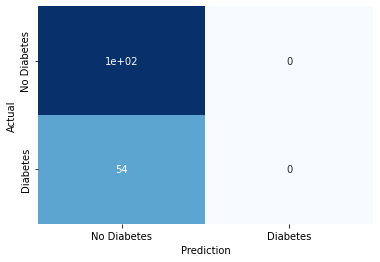

<Figure size 432x288 with 0 Axes>

In [20]:
# Results - Confusion Matrix
y_pred=model.predict(X_test)
y_test_pred=np.argmax(y_pred,axis=1)
c_matrix=confusion_matrix(y_test, y_test_pred)
ax=sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes','Diabetes'],yticklabels=['No Diabetes','Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()